In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GRADED 
Use global and groupby aggregates to answer the following questions

    - What is the average tip amount 
    - What is the average bill amount 
    - What is the average tip by gender 
    - What is the average tip on a sunday by gender 
    - Which party size gives the maximum tip as a percent of total bill amount 

What is the average tip amount?

In [2]:
import pandas as pd
tips1=tips.iloc[:,[1]]
print('The average',tips1.mean())

The average tip    2.998279
dtype: float64


What is the average bill amount?

In [3]:
tips2=tips.iloc[:,[0]]
print('The average',tips2.mean())

The average total_bill    19.785943
dtype: float64


What is the average tip by gender?

In [4]:
tips3=tips.iloc[:,[1,2]]
tips3.groupby('sex').mean()

,tip
sex,
Male,3.089618
Female,2.833448


What is the average tip on a sunday by gender?

In [5]:
tips4=tips.loc[(tips['day']=='Sun')]
tips5=tips4.iloc[:,[1,2]]
tips5.groupby('sex').mean()

,tip
sex,
Male,3.220345
Female,3.367222


Which party size gives the maximum tip as a percent of total bill amount?

In [6]:
tips['Percent']=tips.apply(lambda x:x['tip']/x['total_bill'],axis=1)
tips6=tips.iloc[:,[6,7]]
tips7=tips6['Percent'].max()
tips8=tips6.loc[(tips6['Percent']==tips7)]
tips8

,size,Percent
172,2,0.710345


### GRADED
    - Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
    - Generate the plots using matplotlib, bokeh and seaborn


Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)

C:\Users\Jack_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


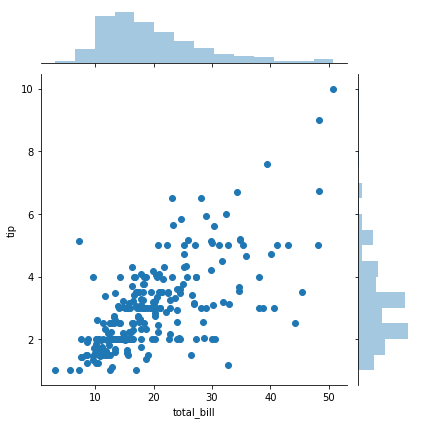

In [7]:
tips9=tips.iloc[:,[0,1]]
sns.jointplot(x='total_bill',y='tip',data=tips9)

Generate the plots using matplotlib, bokeh and seaborn

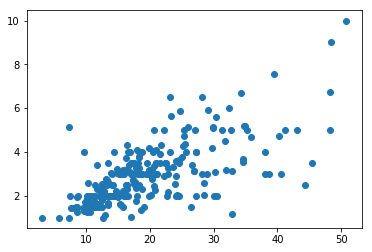

In [8]:
import matplotlib.pyplot as plt
x=tips['total_bill']
y=tips['tip']
plt.figure('Drew')
plt.scatter(x,y)
plt.draw()

The above chart uses matplotlib

C:\Users\Jack_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


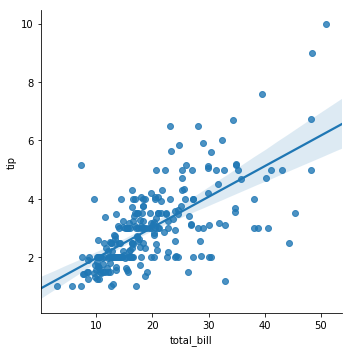

In [9]:
sns.lmplot(x='total_bill',y='tip',data=tips)

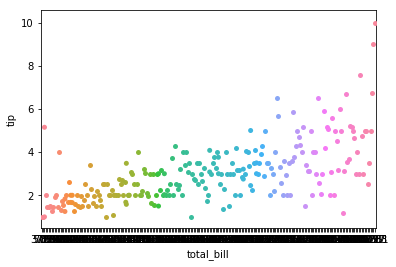

In [10]:
sns.swarmplot(x='total_bill',y='tip',data=tips)

The above chart uses seaborn.

In [41]:
from bokeh.plotting import figure,output_file,show
x=tips['total_bill']
y=tips['tip']
output_file('lines.html')
p=figure(title='Tip and Bill',x_axis_label='x',y_axis_label='y')
p.line(x,y,legend='Temp',line_width=2)
show(p)


INFO:bokeh.io.state:Session output file 'lines.html' already exists, will be overwritten.


In [40]:
import numpy as np
z=np.random.rand(50)*20
p=figure(x_axis_label='x',y_axis_label='y')
p.circle(x,y,size=z,
        color='red')
show(p)

The above code uses bokeh.

### GRADED
    - Generate a box plot that shows average bill amount by day of week
    - Generate a box plot that shows average bill amount by gender
    - Show the above two plots side by side
    - Generate the same plots using matplotlib and bokeh

Generate a box plot that shows average bill amount by day of week

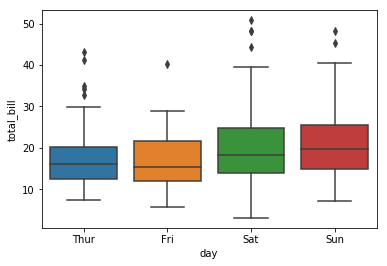

In [13]:
tips10=tips.iloc[:,[0,4]]
tips11=sns.boxplot(x='day',y='total_bill',data=tips10)
tips11

Generate a box plot that shows average bill amount by gender

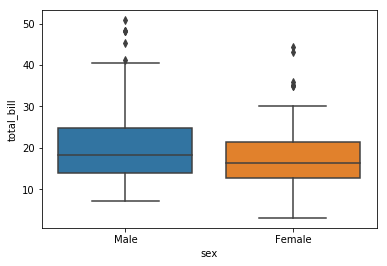

In [14]:
tips12=tips.iloc[:,[0,2]]
tips13=sns.boxplot(x='sex',y='total_bill',data=tips12)
tips13

Show the above two plots side by side

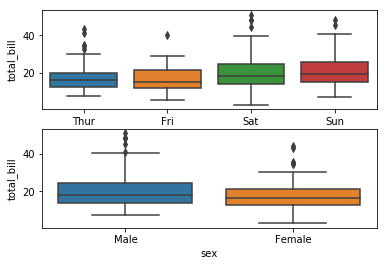

In [15]:
plt.subplot(2,1,1)
sns.boxplot(x='day',y='total_bill',data=tips10)

plt.subplot(2,1,2)
sns.boxplot(x='sex',y='total_bill',data=tips12)

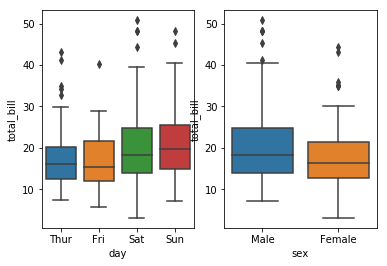

In [16]:
plt.subplot(1,2,1)
sns.boxplot(x='day',y='total_bill',data=tips10)

plt.subplot(1,2,2)
sns.boxplot(x='sex',y='total_bill',data=tips12)

Generate the same plots using matplotlib and bokeh.

Matplotlib

[Text(0, 0, 'Thur'), Text(0, 0, 'Fri'), Text(0, 0, 'Sat'), Text(0, 0, 'Sun')]

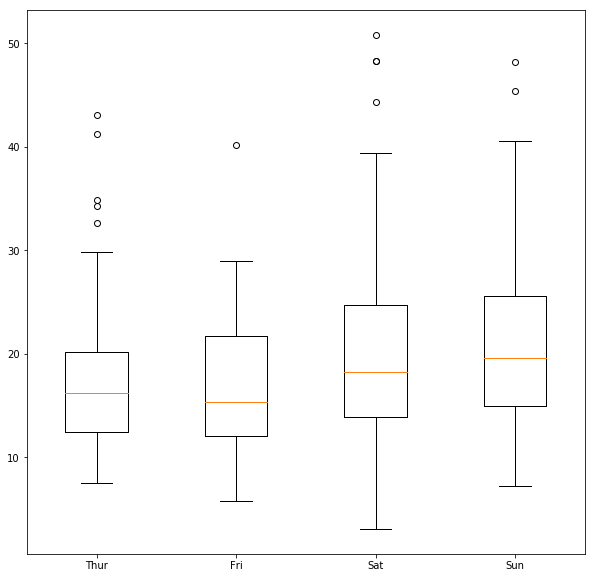

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
Thur=tips.loc[tips['day']=='Thur',:]
Fri=tips.loc[tips['day']=='Fri',:]
Sat=tips.loc[tips['day']=='Sat',:]
Sun=tips.loc[tips['day']=='Sun',:]

plt.boxplot([Thur['total_bill'],Fri['total_bill'],Sat['total_bill'],Sun['total_bill']])
plt.gca().set_xticklabels(['Thur','Fri','Sat','Sun'])

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

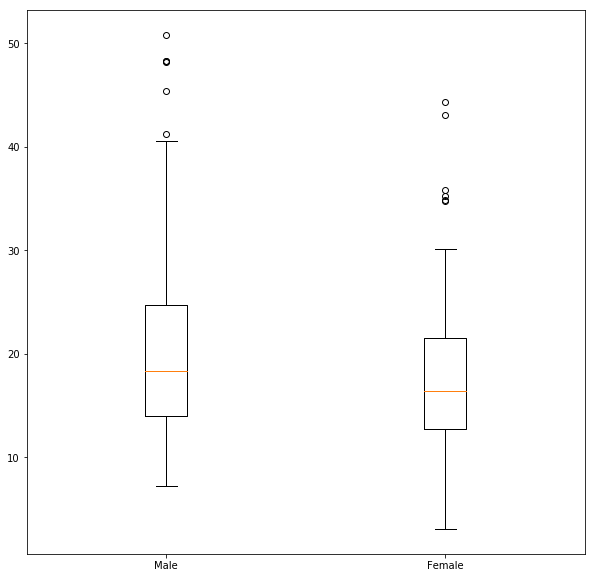

In [18]:
plt.figure(figsize=(10,10))
Male=tips.loc[tips['sex']=='Male',:]
Female=tips.loc[tips['sex']=='Female',:]

plt.boxplot([Male['total_bill'],Female['total_bill']])
plt.gca().set_xticklabels(['Male','Female'])

Bokeh

In [44]:
import numpy as np
import holoviews as hv
title='The average bill by the day of week'
box=hv.BoxWhisker(tips,['day'],'total_bill',label=title)
bk_model=hv.renderer('bokeh').get_plot(box).state
show(bk_model)

In [48]:
import numpy as np
import holoviews as hv
title1='The average bill by gender'
box1=hv.BoxWhisker(tips,['sex'],'total_bill',label=title1)
bk_mode2=hv.renderer('bokeh').get_plot(box1).state
show(bk_mode2)

### GRADED
    - Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
    - Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
    - Are tips larger during lunch or dinner (as a percentage of total_bill)
    - Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
        - Answer the question by visual examination of lmplot output

Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)?

C:\Users\Jack_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


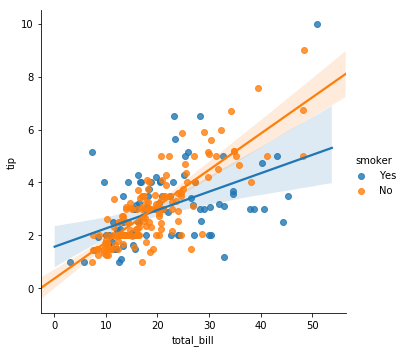

In [20]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips)

For the first question, according to the above chart, I think non-smoker gives a higher tip as a percentage of total_bill. As you can see, compared with the smoker line, the line of non-smoker has a steeper slope, which means that a small increase of total_bill will bring a big increase of tip.What's more, we can conclude that more consumers are non-smoker.

Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)?

C:\Users\Jack_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


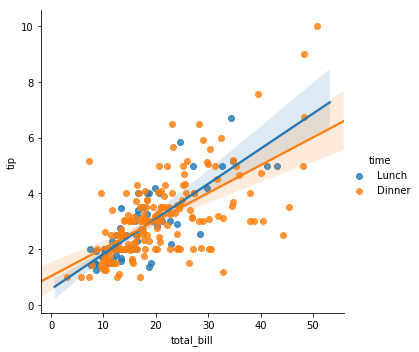

In [21]:
sns.lmplot(x='total_bill',y='tip',hue='time',data=tips)

For the second question, according to the above chart, the tip percentage of Lunch is larger than the tip percentage of Dinner.First of all, the line of Lunch has a steeper slope than the Dinner line, which means that increasing one bill will bring more tips.

Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?

C:\Users\Jack_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


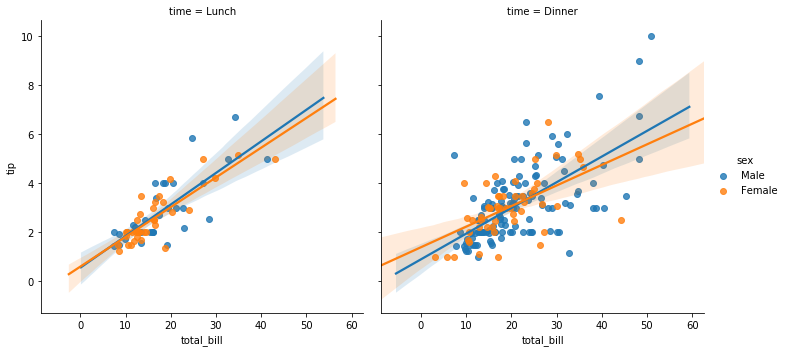

In [22]:
sns.lmplot(x='total_bill',y='tip',hue='sex',col='time',data=tips)

By comparing two above charts, whatever Lunch or Dinner, the line of Male has a steeper slope, which means that the gender that tips the most (as a percentage of total_bill) will not be changed between Lunch and Dinner.